# Asthma

<table><tr><td>
    <a href="http://agrum.org" target="blank"><img src="images/logoAgrum.png"/></a>
    </td><td>
    <a href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" src="images/cc4.png" /></a>
    <br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.<p>
    Authors: <b>Christophe Gonzales</b>.</p>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

# import the computation tools of aGrUM
import pyAgrum as gum

# import the graphical display functions
import pyAgrum.lib.notebook as gnb

## The model

In [2]:
# load the "asthma" Bayesian network
bn=gum.loadBN('res/asthma.bif')

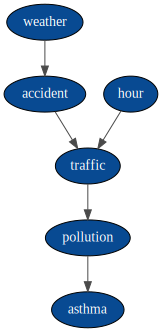

In [3]:
# display the Bayesian network
gnb.showBN(bn,nodeColor={n:0.9 for n in bn.names()},cmap=plt.get_cmap('Blues'))

In [4]:
# display the conditional probability table of asthme given pollution
gnb.showPotential(bn.cpt(bn.idFromName('asthma')),digits=4)

## Some inference

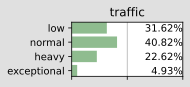

In [5]:
# display the probability distribution of Variable "trafic"
gnb.showPosterior (bn, {}, "traffic" )

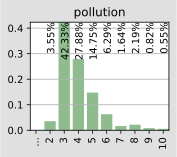

In [6]:
# display the probability distribution of Variable "pollution"
gnb.showPosterior ( bn, {}, "pollution")

In [7]:
# display the distribution somewhat differently
gum.getPosterior ( bn, {}, "pollution")

(pyAgrum.Potential<double>@00000222A63E67A0) 
  pollution                                                                                        |
1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |
---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 0.0000  | 0.0355  | 0.4233  | 0.2788  | 0.1475  | 0.0629  | 0.0164  | 0.0219  | 0.0082  | 0.0055  |

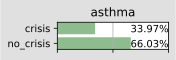

In [8]:
# more interesting: display the posterior distribution of "asthme"
# given that we observed that time is 8:00 and weather is cloudy
gnb.showPosterior (bn, {'hour' : 8, 'weather' : 'cloudy'}, "asthma" )

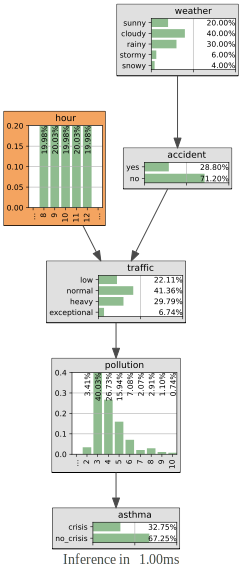

In [9]:
# show the complete model on morning (from 8 to 12) 
gnb.showInference(bn,evs={'hour' : [0]*8+[1]*5+[0]*11})

In [10]:
# show the posterior distributions of all the variables given that
# we observed that heure=8 and meteo=nuageux.
# the tables in beige represent the observations
gnb.flow.row(gnb.getInference(bn,size="9",evs={'hour' : 8, 'weather' : 'cloudy'}),
               gnb.getInference(bn,size="9",evs={'hour': 7, 'accident' : 'yes'}),
              captions=["When time is 8:00 and weatcher is cloudy","When time is 7:00 and there hase been an accident"])